# Aplicação de Bag-Of-Words para Classificação de Notícias ESG Relativas a Empresas

## Etapa 1: Extração das palavras ESG

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup


## Getting the Tickers 
finviz_url = "https://finviz.com/quote.ashx?t="

tickers = ['AMZN', 'META', 'PBR', 'AAPL', 'MSFT', 'TSLA', 'JNJ', 'MCD', 'NKE', 'ADBE', 'EOG', 'ENER', 'UBER', 'BP',
         'AZN', 'RIOT', 'KO', 'WMT', 'VALE', 'SAFT', 'CBAT', 'XBIO', 'BHP', 'CSIQ', 'EKAR', 'EFX', 'AE', 'LNT', 'ADSE',
          'AEIS', 'ENFR', 'ACES', 'AMPY', 'LFG', 'ATO', 'BANC', 'AUB', 'BAC', 'BBD', 'JPM', 'WE', 'HACK', 'CYBR', 
         'CMPO', 'CISO', 'RTM', 'NET', 'ZS', 'CRWD', 'TENB', 'VRNS', 'EVBG', 'RPD', 'QLYS', 'FTNT', 'ALRM',
          'KTOS', 'INVE', 'VRNT', 'AGRI', 'TM', 'PFIE', 'PFE', 'SUZ', 'IBM', 'ELAN', 'CGTX', 'EDUC', 'ATGE',
    'LVLU', 'COUR', 'COE', 'EDU', 'UDMY', 'TWOU', 'UTI', 'ARCE', 'BTI', 'ATVI', 'BZFD', 'EA', 'UAL', 'SAVE', 'CPRX',
    'PXS', 'PDS', 'VECT', 'RENN', 'MTR', 'MTRY', 'TGS', 'STRS', 'SMCI', 'EDAP', 'TMDX', 'IMCR', 'NRT', 'EQT', 'HES', 'BKR',
    'GRIN', 'SBS', 'SBSI', 'CLMT', 'AMLX', 'ELF', 'SELF', 'IDRV', 'LFUS', 'COP', 'OXY', 'IINN', 'CLFD', 'VAL', 'CWCO', 'VTRU', 
    'MCK', 'DGII', 'XOM','SLB', 'MUSA', 'PTEN', 'NC', 'NCMI', 'EXTR', 'EXR', 'DK', 'DKL', 'DHT', 'KNSL', 'ARL', 'BSM', 'LPLA', 
    'CAH', 'PBFX', 'RES', 'RCMT', 'MGI', 'ARLO', 'BSMX', 'CLGN', 'ONEM', 'ACHC', 'AHPI', 'AHG', 'AGL', 'AHCO', 'MDRX',
    'EEIQ', 'COE', 'BEDU', 'BNED', 'YQ', 'STC', 'PSCT', 'FIS', 'IFBD', 'III', 'FIS', 'FTEC', 'AZ', 'ADN', 'AERC', 'QFIN',
    'ADEX', 'AEY', 'BLOK', 'CD', 'DAIO', 'DTST', 'DDOG', 'DTSS', 'VPN', 'INOD', 'AIU', 'PAY', 'PAYA', 'PAYC', 'PAYO',
    'PAYS', 'PAYX', 'APCX', 'IPAY', 'PFFL', 'SMHB', 'IH', 'HGEN', 'HMCOU', 'HUM', 'AHI', 'FLO', 'HRL', 'PBJ', 'WILC',
    'BRID', 'BSFC', 'BGS', 'CALM', 'BRFH', 'HFFG', 'BCAT', 'BFZ', 'AHT', 'ABR', 'COLD', 'AAT', 'PINE', 'MITT',
    'SOBR', 'SAFT', 'SFE', 'SFET', 'SB', 'PSFE', 'AMSF', 'SAFE', 'PFLD', 'AWF',
    'RY', 'AAAU', 'AAC', 'AACI', 'AADR', 'ABCB', 'ACNB', 'AFBI', 'ALRS', 'AMAL', 'BBAR', 
    'BCBP', 'BCH', 'BCML', 'PUK', 'PRU', 'HPE', 'AGR', 'GOLD', 
          'MGF', 'WIP', 'VWOB', 'BHV', 'BBN'
]

## Making it become a dictionary of tables
news_tables = {} 
for ticker in tickers:
    url = finviz_url + ticker

    request = Request(url=url, headers={'user-agent': 'poc-3'}) 
    response = urlopen(request)

    html = BeautifulSoup(response, features='html.parser')

    news_table = html.find(id='news-table') 
    news_tables[ticker] = news_table 
    
    
## Parsing the data
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')
        
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

## Etapa 2: Filtragem das palavras ESG + Aplicação Manual de Classificações

In [2]:
## Making the DataFrame
import pandas as pd

all_words_df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
all_words_df = all_words_df.drop(all_words_df.columns[[0, 1, 2]], axis=1)

e_words = [
    'resource use', 'ecotoxicity', 'recycling', 'ocean plastic', 'circular economy', 'food waste', 'extraction desertification',
    'rare earths', 'pollution', 'topsoil loss', 'soil', 'waste', 'soil acidification', 'crop yields', 'water scarcity',
    'air quality', 'regenerative agriculture', 'air quality', 'drinkable water', 'clean energy', 'water', 'energy', 'net zero',
    'pesticides', 'climate change', 'conservation', 'carbon emissions', 'mass extinction', 'fertilizers', 'anti microbial resistance',
    'bee fertility', 'climate adaptation', 'ecosystem collapse', 'deforestation', 'biodiversity', 'sea level rises', 'ocean acidification',
    'over fishing', 'animal welfare'
]
s_words = [
    'racial justice', 'gender equality', 'disability', 'LGBT+ inclusion', 'financial inclusion', 'diversity', 'working considitions',
    'vulnerable communities', 'worker safety', 'refugees', 'inequality', 'conflict minerals', 'human trafficking', 'forced labor',
    'access', 'in work poverty', 'digital inclusion', 'living wage', 'migration', 'child labor', 'human rights', 'skills',
    'education', 'just transition', 'healthcare', 'drug pricing', 'AI', 'automation', 'future of work', 'health', 'mental health',
    'pandemics', 'floods', 'burnout', 'workplace health', 'sugar', 'nutrition', 'labor relations', 'substance misuse',
    'hunger', 'food', 'food safety', 'disinformation', 'fake news', 'addiction', 'alcohol abuse', 'gambling', 'freedom of assembly',
    'access to justice'
]
g_words = [
    'money laundering', 'homophobia', 'corruption', 'workplace conduct', 'conduct', 'transparency', 'racism', 'financial crime',
    'sexism', 'inappropriate behavior', 'bullying', 'anti trust', 'mis selling', 'discrimination', 'harassment', 'transphobia', 
    'oversight', 'rate fixing', 'fraud', 'bribery', 'board', 'composition', 'capacity', 'competency', 'data misuse',
    'criminal misconduct', 'data', 'privacy', 'tax', 'corporate tax', 'tax avoidance', 'CEO', 'CEO pay', 'payment',
    'privacy', 'data stewardship', 'share buybacks', 'remuneration', 'bonuses', 'dividends', 'money', 'stakeholder', 'shareholder'
]

## creating the words that need to be taken 
esg_words = e_words + s_words + g_words

## making the DataFrame become a list
all_words_list = list(all_words_df['title']) 


## making a function that verify the words that comes in, to make sure it is an ESG word
def verify_words(text: str): 
    return text in esg_words

def verify_column(word: str):
    if word in e_words:
        return "ENVIRONMENTAL"
    elif word in s_words:
        return "SOCIAL"
    elif word in g_words:
        return "GOVERNANCE"
    else:
        return "NO ESG"

## filtering the titles according to ESG words
texts_esg: list = []
esg_classification: list = []
    
for title in all_words_list:
    text_split = title.split() # creating a list with each word on the phrase
    
    for word in text_split: # acessing each word on the phrase
        if verify_words(word.lower()): # verifying
            esg_classification.append(verify_column(word.lower()))
            texts_esg.append(title)
            break

print("Número total de títulos: ", len(all_words_list))
print("Número total de títulos com práticas ESG: ", len(texts_esg))
            
## Making a new DataFrame with the ESG words only
esg_words_df = pd.DataFrame(texts_esg, columns=['title'])
esg_words_df['classification'] = esg_classification
esg_words_df['title'] = esg_words_df['title'].str.lower()
print()
print("Valores únicos do DataFrame: ", esg_words_df['classification'].unique())
esg_words_df.head()

Número total de títulos:  20540
Número total de títulos com práticas ESG:  2738

Valores únicos do DataFrame:  ['GOVERNANCE' 'SOCIAL' 'ENVIRONMENTAL']


,title,classification
0,amazon's stock bounces sharply off 2 1/2-year ...,GOVERNANCE
1,amazon stock today: how a bearish option trade...,GOVERNANCE
2,eu tax ruling on fiat-chrysler is rejected by ...,GOVERNANCE
3,"wakemed, duke health argue no harm done in fac...",SOCIAL
4,former petrobras executive asks brazil court t...,GOVERNANCE


SOCIAL           973
ENVIRONMENTAL    894
GOVERNANCE       871
Name: classification, dtype: int64

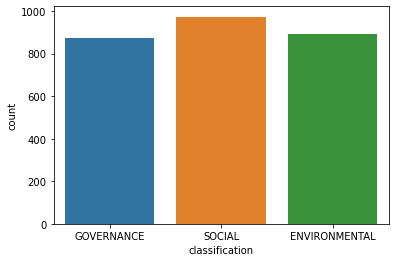

In [3]:
import seaborn as sns

## Visualizing the distribution of the abbreviations
sns.countplot(x = 'classification', data = esg_words_df)

## Visualizing the counting of the abbreviations
esg_words_df['classification'].value_counts()

## Etapa 3: Pré-Processamento dos textos

In [4]:
import re
import nltk

lst_stopwords = nltk.corpus.stopwords.words("english")

## Preprocessing the titles
def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## -- CLEANING -- 0 (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## -- TOKENIZE -- 01 (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
                
    ## -- STEMMING -- 02 (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## -- LEMMATIZATION -- 03 (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## -- CONVERTING BACK TO STRING FROM LIST -- 04
    text = " ".join(lst_text)
    return text

## -- FINAL RESULT --
esg_words_df["title_cleaned"] = esg_words_df["title"].apply(lambda x: 
          preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
esg_words_df.head()

,title,classification,title_cleaned
0,amazon's stock bounces sharply off 2 1/2-year ...,GOVERNANCE,amazon stock bounce sharply 2 12year low upbea...
1,amazon stock today: how a bearish option trade...,GOVERNANCE,amazon stock today bearish option trade make m...
2,eu tax ruling on fiat-chrysler is rejected by ...,GOVERNANCE,eu tax ruling fiatchrysler rejected court
3,"wakemed, duke health argue no harm done in fac...",SOCIAL,wakemed duke health argue harm done facebookpa...
4,former petrobras executive asks brazil court t...,GOVERNANCE,former petrobras executive asks brazil court b...


## Etapa 4: Aplicação do Algoritmo TF-IDF

In [5]:
import numpy as np
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

## changing the name of the column
esg_words_df.rename(columns = {'classification':'y'}, inplace = True)


## split dataset
dtf_train, dtf_test = model_selection.train_test_split(esg_words_df, test_size=0.3)

## get target
y_train = dtf_train["y"].values
y_test = dtf_test["y"].values

print("Número de textos de treino: ", len(y_train))
print("Número de textos de teste: ", len(y_test))

Número de textos de treino:  1916
Número de textos de teste:  822


In [6]:
## Applying the algorithm
from sklearn import feature_extraction, feature_selection, model_selection, naive_bayes, pipeline, manifold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## Feature Engineering, the process to create features by extracting information from the data
vectorizer = feature_extraction.text.TfidfVectorizer(max_features= 1500, ngram_range=(1,2))

## getting the corpus
corpus = dtf_train['title_cleaned']

vectorizer.fit(corpus)

## I will use the vectorizer on the preprocessed corpus of the train set to extract a vocabulary and create 
## the feature matrix.
X_train = vectorizer.transform(corpus)

## keeping only the features with a certain p-value from the Chi-Square test.
y = dtf_train["y"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for f in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==f)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":f}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

## I reduced the number of features by keeping the most statistically relevant ones. 
## Let’s print some:
for f in np.unique(y):
   print("# {}:".format(f))
   print("  . selected features:",
         len(dtf_features[dtf_features["y"]==f]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["y"]==f]["feature"].values[:10]))
   print(" ")

# ENVIRONMENTAL:
  . selected features: 158
  . top features: energy,water,energy stock,cbak energy,consolidated,consolidated water,advanced energy,cbak,energy announces,advanced
 
# GOVERNANCE:
  . selected features: 186
  . top features: data,board,shareholder,director,board director,data io,io,energy,shareholder alert,alert
 
# SOCIAL:
  . selected features: 180
  . top features: education,healthcare,health,energy,education group,noble,barnes,barnes noble,online education,noble education
 


/Users/bianca/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
## Refit the vectorizer on the corpus by giving this new set of words as input. That will produce a smaller 
## feature matrix and a shorter vocabulary.

vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [8]:
# using the Naive Bayes algorithm
classifier = naive_bayes.MultinomialNB()

# pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
# train classifier
model["classifier"].fit(X_train, y_train)

MultinomialNB()

## Etapa 5: Aplicando métricas sobre o modelo TF-IDF

In [9]:
## test
X_test = dtf_test["title_cleaned"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

Accuracy: 0.97
Detail:


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'ENVIRONMENTAL'),
  Text(0, 1.5, 'GOVERNANCE'),
  Text(0, 2.5, 'SOCIAL')])

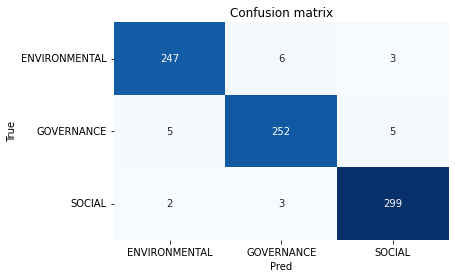

In [10]:
## evaluating the performance of the Bag-of-Words model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
    
classes = np.unique(y_test)
    
## Accuracy
accuracy = metrics.accuracy_score(y_test, predicted)

print("Accuracy:",  round(accuracy,2))

## Plot confusion matrix
print("Detail:")    
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
#plt.yticks(rotation=0)

## Etapa 6: Comparando o modelo TF-IDF com o método regular de classificação ESG em um novo DataFrame

In [55]:
## getting the dataframe 
df = pd.read_csv("df.csv") 
df = df.drop(df.columns[[0]], axis=1)
df = df.drop_duplicates()
df.head()

,title
0,Next-Generation Dell PowerEdge Servers Dramati...
1,Fair Isaac (FICO) Matches Q4 Earnings Estimates
2,Archer Daniels Midland and Estee Lauder have b...
3,Dell Technologies (DELL) Outpaces Stock Market...
4,Can the PC Market Bounce Back From Its Recent ...


In [56]:
## cleaning the text
df["title_cleaned"] = df["title"].apply(lambda x: 
          preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df.head()

,title,title_cleaned
0,Next-Generation Dell PowerEdge Servers Dramati...,nextgeneration dell poweredge server dramatica...
1,Fair Isaac (FICO) Matches Q4 Earnings Estimates,fair isaac fico match q4 earnings estimate
2,Archer Daniels Midland and Estee Lauder have b...,archer daniel midland estee lauder highlighted...
3,Dell Technologies (DELL) Outpaces Stock Market...,dell technology dell outpaces stock market gai...
4,Can the PC Market Bounce Back From Its Recent ...,pc market bounce back recent low


In [57]:
df = df.drop(df.columns[[0]], axis=1)
df.rename(columns = {'title_cleaned':'news title'}, inplace = True)
df.head()

,news title
0,nextgeneration dell poweredge server dramatica...
1,fair isaac fico match q4 earnings estimate
2,archer daniel midland estee lauder highlighted...
3,dell technology dell outpaces stock market gai...
4,pc market bounce back recent low


In [58]:
## comparing the classifications
      
## getting only the titles with ESG words
# applying the regular way to classify the titles

df_list = list(df['news title']) 

esg_classification: list = []
texts_esg: list = []   
    
for title in df_list:
    text_split = title.split() 
    
    for word in text_split:
        if verify_words(word): 
            esg_classification.append(verify_column(word))
            texts_esg.append(title)
            break
    
df = pd.DataFrame(texts_esg, columns=['news title'])

print("Número total de títulos: ", len(df_list))
print("Número total de títulos com práticas ESG: ", len(texts_esg))
    
## applying TF-IDF model    
model_classification = model.predict(df['news title'])  

## creating the new columns
df['Regular Classification'] = esg_classification
df['TF-IDF Classification'] = model_classification

Número total de títulos:  6950
Número total de títulos com práticas ESG:  863


In [59]:
df.head()
df['news title'][4]

'11 best future food stock buy'

Regular classification


ENVIRONMENTAL    333
SOCIAL           277
GOVERNANCE       253
Name: Regular Classification, dtype: int64

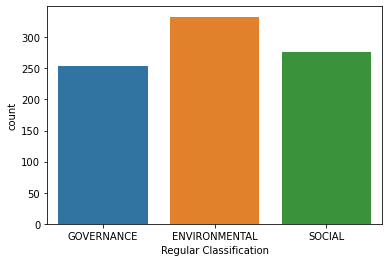

In [60]:
print("Regular classification")
## Visualizing the distribution of the abbreviations
sns.countplot(x = 'Regular Classification', data = df)
## Visualizing the counting of the abbreviations
df['Regular Classification'].value_counts()

TF-IDF


SOCIAL           305
ENVIRONMENTAL    300
GOVERNANCE       258
Name: TF-IDF Classification, dtype: int64

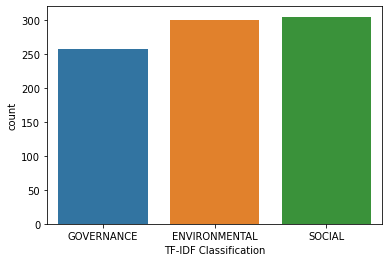

In [61]:
print("TF-IDF")
## Visualizing the distribution of the abbreviations
sns.countplot(x = 'TF-IDF Classification', data = df)

## Visualizing the counting of the abbreviations
df['TF-IDF Classification'].value_counts()

In [64]:
df.head(30)

,news title,Regular Classification,TF-IDF Classification
0,nextgeneration dell poweredge server dramatica...,GOVERNANCE,GOVERNANCE
1,data metadata management company alation draw ...,GOVERNANCE,GOVERNANCE
2,canon usa inc named 2022 energy star partner y...,ENVIRONMENTAL,ENVIRONMENTAL
3,percentage capitol health limited asxcaj share...,SOCIAL,SOCIAL
4,11 best future food stock buy,SOCIAL,SOCIAL
5,heil revamp electric refuse collection body im...,ENVIRONMENTAL,SOCIAL
6,advansor launch new co2 climate solution high ...,ENVIRONMENTAL,ENVIRONMENTAL
7,lyondellbasell shakti plastic industry sign me...,ENVIRONMENTAL,SOCIAL
8,lyondellbasell form joint venture build plasti...,ENVIRONMENTAL,SOCIAL
9,10 best fast money stock buy according hedge fund,GOVERNANCE,GOVERNANCE


In [65]:
df['news title'][17]

'trust workplace requires listening dialogue transparency'